In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm


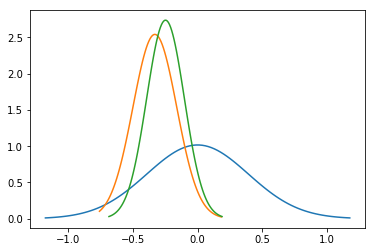

In [12]:
# Create an Odds Ratio for the MCID
n = 420 #Sample size
a = 0.3 * n #Intervention and Outcome
b = 0.45 * n #Control and Outcome
c = n - a #Intervention No Outcome
d = n - b #Control No Outcome

mcid = ((a+0.5) * (d+0.5))/((b+0.5) * (c+0.5))

hr = 0.75 #Hazard Ratio
uci = 1.02 #Upper confidence interval

# Calculate prior

#Skeptical prior mean estimate
#Calculating skeptical prior SD estimate for 5% probability of exceeding projected estimate
z_prior = norm.ppf(0.05)
theta_prior = np.log(1)
sd_prior = (np.log(mcid)-theta_prior)/z_prior

# Calculate enthusiastic prior
theta_prior_enth = np.log(mcid)
sd_prior_enth = (np.log(1.05)-np.log(mcid))/norm.ppf(0.975)

#Calculate Likelihood
theta_li = np.log(hr)
sd_li = (np.log(uci)-np.log(hr))/norm.ppf(0.975)

#Calculate Posterior
theta_post = ((theta_prior/sd_prior**2)+(theta_li/sd_li**2))/((1/sd_prior**2)+(1/sd_li**2))
sd_post = np.sqrt(1/((1/sd_prior**2)+(1/sd_li**2)))

x = np.linspace(theta_prior - 3*sd_prior, theta_prior + 3*sd_prior, 100)
y = np.linspace(theta_li - 3*sd_li, theta_li + 3*sd_li, 100)
z = np.linspace(theta_post - 3*sd_post, theta_post + 3*sd_post, 100)
plt.plot(x, stats.norm.pdf(x, theta_prior, sd_prior))
plt.plot(y, stats.norm.pdf(z, theta_li, sd_li))
plt.plot(z, stats.norm.pdf(z, theta_post, sd_post))
plt.show()

#prior <- dnorm(mu.plot, prior.theta, prior.sd)
#likelihood <- dnorm(mu.plot, L.theta, L.sd)
#posterior <- dnorm(mu.plot, post.theta, post.sd)




In [ ]:



#Calculate posterior median effect and 95% certainty interval
cbind(exp(qnorm(0.025, post.theta,post.sd, lower.tail = T)), exp(qnorm(0.5, post.theta,post.sd)), exp(qnorm(0.975, post.theta,post.sd)))

#Calculate probability benefit (HR < 1.0)
pnorm(log(1), post.theta,post.sd, lower.tail=T)

# Plot the prior density
mu.plot <- seq(-2,2,by=0.025)
prior <- dnorm(mu.plot, prior.theta, prior.sd)
likelihood <- dnorm(mu.plot, L.theta, L.sd)
posterior <- dnorm(mu.plot, post.theta, post.sd)

plot(exp(mu.plot), exp(prior),
type=“l”, col=“black”, lty=3,
xlim=c(0,1.5),
ylim=c(1,15),
lwd=2,
xlab=“Hazard Ratio”,
ylab=“Probability Density”)
#likelihood
lines(exp(mu.plot), exp(likelihood), col=“green”,lwd=2,lty = 2)
#posterior
lines(exp(mu.plot), exp(posterior), col=“red”,lwd=2)
abline(v=1, col = “gray”)

legend(“topleft”,
col=c(“black”,“green”,“red”),
lty=c(3,2,1),
lwd=2, #line width = 2
legend=c(“Prior”, “Likelihood”, “Posterior”))

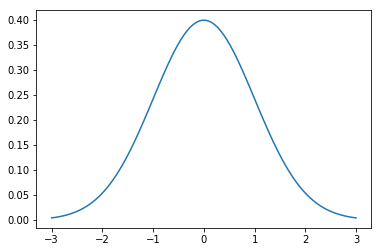

In [5]:



mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()